<h1 align='center'> Rocket Launch Prediction </h1>
<h4 align='center'> Predict the launch of the rocket using Machine Learning </h4> 

## INTRODUCTION

<b> Haven't we all wondered why every rocket launch happens in certain specific destinations? Most of us would have even wished to have the launch take place right next to our homes. Each space program takes place in locations which is safe for a rocket to enter space. To increase the chance of success, these places are selected such that they are close to the equator. Furthermore, if by any chance the launch is aborted, it's safest over a large body of water. </b>

<b> In the case of NASA, Cape Canaveral incorporates all these features. </b>

<b> But one can easily point out that, the area experiences hurricanes, rain storms, and humidity - all factors that can cause issues during a rocket launch. </b>

<b> There are many potential factors at play. NASA has to take into account many different data sources to get the most accurate picture of what the rocket will have to endure on its 100 kilometer journey into space. </b>

<br></br>

### The Challenge

<b> Plans for a rocket launch occur over the course of years. So, NASA might have to choose a time and date several years before launch. If you've ever seen your local weather person or meteorologist, you know that sometimes it's hard to accurately predict weather even hours in advance. </b>

<b> To help predict and analyze weather data, NASA partners closely with NOAA - the National Oceanic and Atmospheric Administration . NOAA also shares data with the public, so you can start to analyze similar patterns and make similar predictions using their data. </b>

<b> NASA also collects their own data that they make publicly available. At Data.NASA.gov , one can find tens of thousands of datasets. NASA also provides developer resources for people who want to integrate NASA data into their applications. </b>

<b> Experts use this data to ensure the best prediction possible, and to select a safe launch date. </b>

- <b> In this challenge, we are to build a predictive model that answers the question: "Will the launch take place on a particular day" based on the weather data. </b>


- https://docs.microsoft.com/en-us/learn/modules/collect-manipulate-data-python-nasa/3-explore-data - We can obtain the data from here. 

## 0. Import relevant Dependencies

Incase you are getting any error saying the package is not installed while running the below cell, then you can use two methods:
- pip install ________.
- google 'How to install ________'.

In [1]:
# Import Dependencies -To see the graphs in the notebook.
%matplotlib inline   

# Python Imports
import math,time,random,datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization -This is where the graphs come in.
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
plt.style.use('fivethirtyeight')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine Learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Loading the required Data

> I have kept my data in a folder called "NASA" which is then again kept in a folder called "DATA".

In [2]:
# Import the launch data.
launch = pd.read_csv('DATA/NASA/Launch.csv', encoding= 'cp1252')

- Here, we use " encoding= 'cp1252' " because the data is not encoded as UTF-8; everything is ASCII except for that single 0x92 byte. So we decode it as <u> Windows codepage 1252 </u> instead. Else we will get a "UnicodeError"

- For more information regarding this visit: https://en.wikipedia.org/wiki/Windows-1252

In [3]:
# Viewing the launch dataset
pd.set_option('display.max_columns', None)
launch.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,NaN,4-Dec-58,NaN,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,75.0,55.0,65.0,0.0,0.08,E,16.0,15.0,NaN,NaN,NaN,30.22,NaN,10:26,Cloudy,NaN
1,NaN,5-Dec-58,NaN,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,75.0,55.0,65.0,0.0,0.09,E,14.0,10.0,NaN,NaN,NaN,30.2,NaN,10:26,Cloudy,NaN
2,Pioneer 3,6-Dec-58,1:45,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,75.0,55.0,65.0,0.0,0.09,NE,15.0,10.0,11.0,NaN,NaN,30.25,NaN,10:25,Cloudy,NaN
3,NaN,7-Dec-58,NaN,Cape Canaveral,NaN,NaN,76.0,57.0,66.04,NaN,75.0,55.0,65.0,0.0,0.08,N,10.0,10.0,NaN,NaN,NaN,30.28,NaN,10:25,Partly Cloudy,NaN
4,NaN,8-Dec-58,NaN,Cape Canaveral,NaN,NaN,79.0,60.0,70.52,NaN,75.0,55.0,65.0,0.0,0.09,E,12.0,10.0,NaN,NaN,NaN,30.23,NaN,12:24,Partly Cloudy,NaN


In [4]:
print("Dimensionality of the launch dataset: ", launch.shape)

Dimensionality of the launch dataset:  (300, 26)


- So from this we understand that there are a total of 300 rows and 26 columns.

### Data Dictionary

- **Name (Name of the rocket or spaceship): **

- **Date **

- **Time ** 

- **Location (Place the launch took place): ** Cape Canaveral, Kennedy

- **Crewed or Uncrewed (Whether the launch had passengers or not) **

- **Launched?: ** Y = Yes, N = No
<br></br>

- **High Temp **

- **Low Temp **

- **Ave Temp **

- **Temp at Launch Time ** 

- **Hist High Temp ** 

- **Hist Low Tem ** 

- **Hist Ave Temp ** 
<br></br>

Precipitation is any product of the condensation of atmospheric water vapor that falls under gravity from clouds. The main forms of precipitation include drizzle, rain, sleet, snow, ice pellets, graupel and hail.

- **Percipitation at Launch Time**

- **Hist Ave Percipitation **	
<br></br>

- **Wind Direction: ** E = East, NE = North East, N = North, SE = South East, W = West, NW = North West, S = South, SW = South West	

- **Max Wind Speed ** 	

- **Visibility ** 

- **Wind Speed at Launch Time **	

- **Hist Ave Max Wind Speed ** 

- **Hist Ave Visibility ** 

- **Sea Level Pressure ** 

- **Hist Ave Sea Level Pressure** 

- **Day Length**

- **Condition ** Cloudy, Partly Cloudy, Mostly Cloudy, Fair, Windy, T-Storm, Rain, Thunder, Partly Cloudly, Light Rain, Heavy T-Storm

- **Notes **	

## 2. Exploratory Data Analysis

**PROBLEM: ** To predict whether is a rocket will launch based on the information provided in the dataset.

In [5]:
launch.describe()

,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Hist Ave Sea Level Pressure
count,299.000000,299.000000,299.000000,59.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,59.000000,0.0,0.0,0.0
mean,81.394649,38.745819,69.747124,75.101695,81.852843,62.872910,72.389900,0.063043,0.413478,16.842809,12.929766,10.593220,NaN,NaN,NaN
std,9.026700,33.423090,10.867407,10.471134,6.860432,8.806109,7.825282,0.211995,4.676693,4.701710,6.044445,4.672438,NaN,NaN,NaN
min,51.000000,0.000000,29.040000,50.000000,71.000000,49.000000,60.000000,0.000000,0.060000,8.000000,7.000000,2.000000,NaN,NaN,NaN
25%,77.000000,0.000000,63.050000,70.000000,75.000000,55.000000,65.000000,0.000000,0.080000,14.000000,10.000000,7.000000,NaN,NaN,NaN
50%,82.000000,51.000000,71.610000,77.000000,82.000000,64.000000,72.000000,0.000000,0.110000,16.000000,10.000000,10.000000,NaN,NaN,NaN
75%,88.000000,72.000000,78.530000,81.500000,88.000000,73.000000,80.000000,0.000000,0.200000,18.000000,15.000000,12.500000,NaN,NaN,NaN
max,99.000000,83.000000,90.790000,98.000000,91.000000,79.000000,82.000000,1.800000,81.000000,60.000000,80.000000,26.000000,NaN,NaN,NaN


> Here, we can see that most of the data have 299 observation out of 300. The temperature and wind speed at launch time has only 59 observations. This means that there are missing values. We will look more into these columns later. 
- It can also be noted that three columns ('Hist Ave Max Wind Speed', 'Hist Ave Visibility', 'Hist Ave Sea Level Pressure') have no values in them. Thus by our initial analysis we can remove/drop them.

### Missing Values

- In any dataset we will initially try to find out where the missing data are. 

<AxesSubplot:>

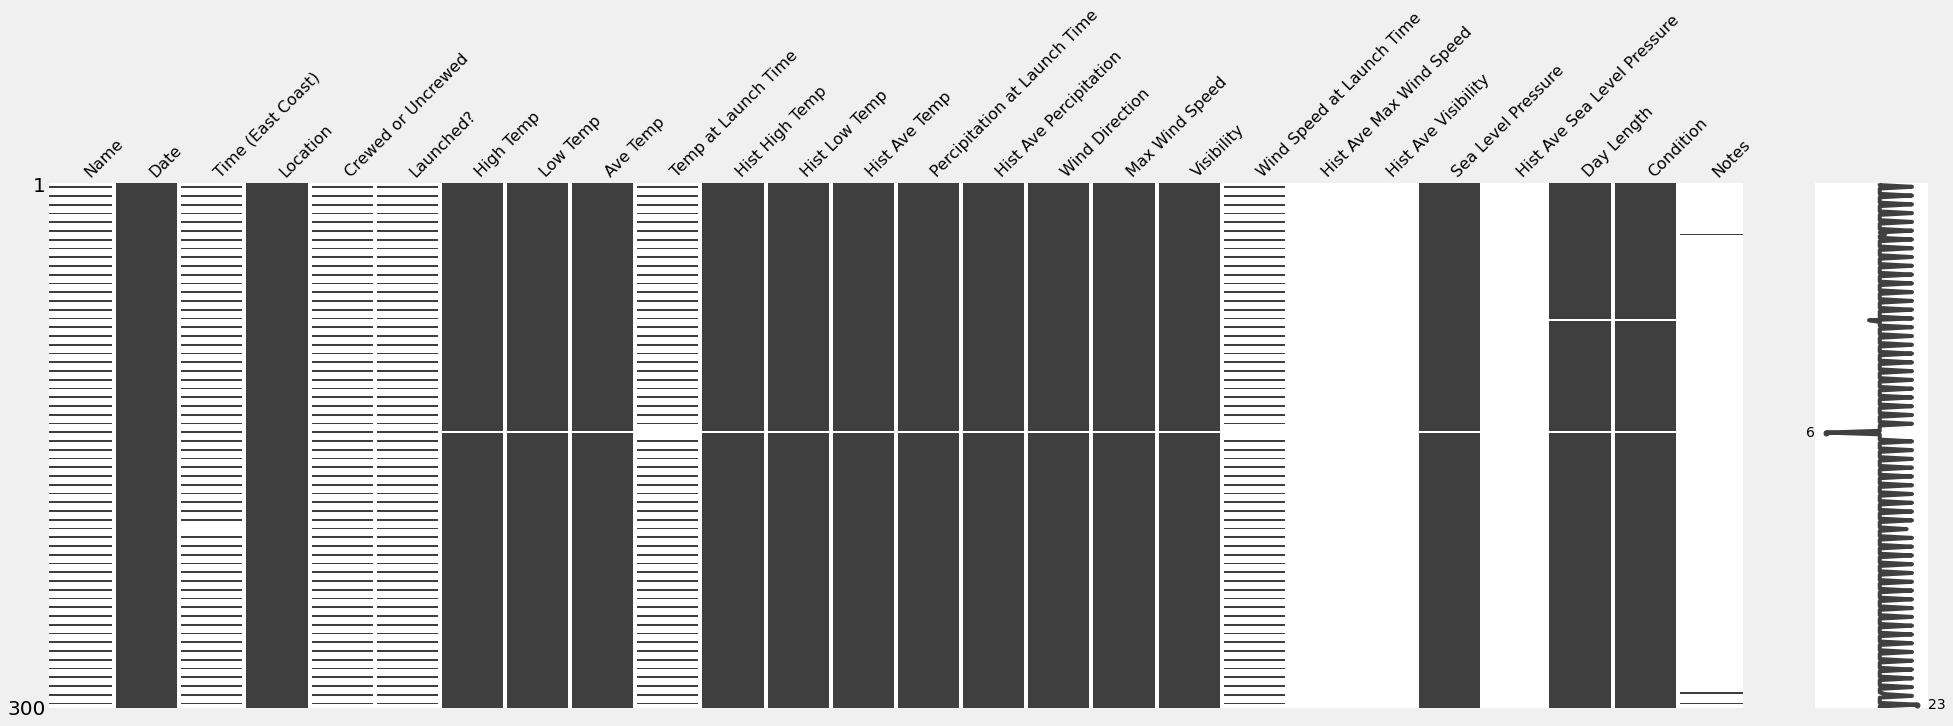

In [6]:
# To plot a graphic of missing values
missingno.matrix(launch,figsize=(30,9))

#sns.heatmap(launch.isnull())           --> This method can also be used.

- It is important to visualise missing values, because then you will know what are the major NaN values in your dataset.
- Here we can see that out most of the columns have quite a few missing values.

In [7]:
# To get the total number of missing values in each columns
launch.isnull().sum()

Name                            240
Date                              0
Time (East Coast)               241
Location                          0
Crewed or Uncrewed              240
Launched?                       240
High Temp                         1
Low Temp                          1
Ave Temp                          1
Temp at Launch Time             241
Hist High Temp                    1
Hist Low Temp                     1
Hist Ave Temp                     1
Percipitation at Launch Time      1
Hist Ave Percipitation            1
Wind Direction                    1
Max Wind Speed                    1
Visibility                        1
Wind Speed at Launch Time       241
Hist Ave Max Wind Speed         300
Hist Ave Visibility             300
Sea Level Pressure                1
Hist Ave Sea Level Pressure     300
Day Length                        2
Condition                         2
Notes                           297
dtype: int64

### Filling the missing values (Name column).

- We are filling in the missing values of the Name column because this will help us split the data in a shuffled manner. 
- There is also the fact that the Name doesn't play much role in determining the launch.

In [8]:
# How many different names are there?
launch['Name'].value_counts()[:20]      #--> This can be used to view the different types of names (here we will check the first 20).

Space X Dragon     2
Apollo 14          1
Pioneer 3          1
Ranger 4           1
Pioneer 11         1
Lunar Orbiter 3    1
Galileo            1
Mariner 9          1
Lunar Orbiter 5    1
Gemini 8           1
Juno               1
Voyager 2          1
Gemini 4           1
Curiosity          1
Gemini 3           1
Apollo 8           1
Surveyor 5         1
Deep Space 1       1
Mariner 6/7        1
Apollo 11          1
Name: Name, dtype: int64

In [9]:
# How many missing values are there in Name
launch['Name'].isnull().sum()

240

In [10]:
# Filling the missing values in the Name column
launch['Name'] = launch['Name'].ffill(limit= 2)         # --> Here we will fill the 2 rows below.
launch['Name'] = launch['Name'].bfill(limit= 2)         # --> Here we will fill the 2 rows above.

Since these many missing values are there let's see how we can fill them. 

- We know that these missing values happened due to the fact that NASA collects data of days before and after the launch date. 

Thus lets fill the each row with its respective Rocket Name.

In [11]:
# Viewing the launch dataset
launch

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,Pioneer 3,4-Dec-58,NaN,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,75.0,55.0,65.0,0.00,0.08,E,16.0,15.0,NaN,NaN,NaN,30.22,NaN,10:26,Cloudy,NaN
1,Pioneer 3,5-Dec-58,NaN,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,75.0,55.0,65.0,0.00,0.09,E,14.0,10.0,NaN,NaN,NaN,30.2,NaN,10:26,Cloudy,NaN
2,Pioneer 3,6-Dec-58,1:45,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,75.0,55.0,65.0,0.00,0.09,NE,15.0,10.0,11.0,NaN,NaN,30.25,NaN,10:25,Cloudy,NaN
3,Pioneer 3,7-Dec-58,NaN,Cape Canaveral,NaN,NaN,76.0,57.0,66.04,NaN,75.0,55.0,65.0,0.00,0.08,N,10.0,10.0,NaN,NaN,NaN,30.28,NaN,10:25,Partly Cloudy,NaN
4,Pioneer 3,8-Dec-58,NaN,Cape Canaveral,NaN,NaN,79.0,60.0,70.52,NaN,75.0,55.0,65.0,0.00,0.09,E,12.0,10.0,NaN,NaN,NaN,30.23,NaN,12:24,Partly Cloudy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Space X Dragon,28-May-20,NaN,Cape Canaveral,NaN,NaN,87.0,71.0,79.36,NaN,87.0,70.0,79.0,0.00,0.15,S,20.0,10.0,NaN,NaN,NaN,30.08,NaN,13:45,Thunder,NaN
296,Space X Dragon,29-May-20,NaN,Cape Canaveral,NaN,NaN,86.0,72.0,79.50,NaN,88.0,70.0,79.0,0.01,0.16,SE,18.0,10.0,NaN,NaN,NaN,30.05,NaN,13:46,Fair,NaN
297,Space X Dragon,30-May-20,20:22,Cape Canaveral,Crewed,Y,87.0,75.0,79.69,80.0,88.0,70.0,79.0,0.00,0.16,SE,16.0,10.0,7.0,NaN,NaN,30.03,NaN,13:47,Fair,Rain before launch
298,Space X Dragon,31-May-20,NaN,Cape Canaveral,NaN,NaN,87.0,72.0,79.70,NaN,88.0,70.0,79.0,0.46,0.16,E,13.0,10.0,NaN,NaN,NaN,30.01,NaN,13:47,Cloudy,NaN


In [12]:
# Let's check if there are anymore missing values
launch['Name'].isnull().sum()

0

### Splitting our dataset into a train and test dataset.

- It is always important to split our data into a training dataset (For out model to learn) and a testing dataset (To check if we modeled in the correct way).

For this we will use the "train_test_split" dependency provided by "sklearn" to make our jobs easier.

In [13]:
# Split the launch dataset.
train, test = train_test_split(launch, test_size= 0.30, random_state= 42, shuffle= True)

In [14]:
print("Dimensionality of the train dataset: ", train.shape)
print("Dimensionality of the test dataset: ", test.shape)

Dimensionality of the train dataset:  (210, 26)
Dimensionality of the test dataset:  (90, 26)


### Create two new dataframes to perform our Data Analysis.

Keep one for exploring discretised continuous variables (continuous variable which have been sorted into some kind of category) and another for exploring continuous variables. 

- **Continuous Variables: ** 0-100 (Here there is no break in between)

- **Discretised Continuous Variables: ** 0-10, 10-20, ..... ,90-100 (Here we are putting them into different bins or intervals)

We are separating the data so that we can run different types of models over each dataframe.

In [15]:
df_bin = pd.DataFrame() #For discretised continuous variables 
df_con = pd.DataFrame() #For continuous variables 

### What Datatypes are there in the dataframe?

We usually consider features with a datatype of object as categorical features. And those with float or int could be numerical features.

However, sometimes the features that we consider as numerical might actually turn out to be categorical.

The next few steps will help us figure out how to process our data so our machine learning model can learn from it.
Ideally all the features will be encoded into a numerical value of some kind (maybe 0 or 1 / something else).

In [16]:
# Datatypes in the dataset
launch.dtypes

Name                             object
Date                             object
Time (East Coast)                object
Location                         object
Crewed or Uncrewed               object
Launched?                        object
High Temp                       float64
Low Temp                        float64
Ave Temp                        float64
Temp at Launch Time             float64
Hist High Temp                  float64
Hist Low Temp                   float64
Hist Ave Temp                   float64
Percipitation at Launch Time    float64
Hist Ave Percipitation          float64
Wind Direction                   object
Max Wind Speed                  float64
Visibility                      float64
Wind Speed at Launch Time       float64
Hist Ave Max Wind Speed         float64
Hist Ave Visibility             float64
Sea Level Pressure               object
Hist Ave Sea Level Pressure     float64
Day Length                       object
Condition                        object


### Exploring each of these features 
We will go through each of the columns and see which all we can use in our first models. Some of them needs more preprocessing than the others to get ready.

In [17]:
train.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
194,Voyager 2,22-Aug-77,NaN,Cape Canaveral,NaN,NaN,88.0,0.0,76.14,NaN,90.0,73.0,82.00,0.0,0.25,W,20.0,10.0,NaN,NaN,NaN,29.96,NaN,12:57,Cloudy,NaN
101,Mariner 8,8-May-71,NaN,Cape Canaveral,NaN,NaN,82.0,64.0,73.58,NaN,82.0,64.0,73.58,0.0,0.09,NE,21.0,7.0,NaN,NaN,NaN,29.92,NaN,13:25,Fair,NaN
68,Surveyor 3,18-Apr-67,NaN,Cape Canaveral,NaN,NaN,81.0,0.0,62.32,NaN,81.0,60.0,71.00,0.0,0.07,W,24.0,10.0,NaN,NaN,NaN,29.81,NaN,12:54,Cloudy,NaN
224,Apollo 7,13-Oct-68,NaN,Cape Canaveral,NaN,NaN,78.0,60.0,69.68,NaN,85.0,69.0,77.00,0.0,0.16,N,17.0,15.0,NaN,NaN,NaN,30.17,NaN,11:32,Partly Cloudy,NaN
37,Ranger 6,30-Jan-64,11:49,Cape Canaveral,Uncrewed,Y,74.0,44.0,58.74,54.0,72.0,50.0,61.00,0.0,0.08,W,15.0,20.0,12.0,NaN,NaN,30.11,NaN,10:49,Fair,NaN


<br></br>
#### FEATURE 1: Launched?
Description: Whether the rocket launched or not.

Key: N = did not launch, Y = launched

***This is the variable we want our ML model to predict based off the others.***

In [18]:
# How many missing values are there in Launched
train['Launched?'].isnull().sum()

168

In [19]:
# Filling the missing values 
train['Launched?'].fillna('N', inplace= True)

In [20]:
# Is there any missing values now
train['Launched?'].isnull().any()

False

> Thus we have cleaned our launched column.

N    169
Y     41
Name: Launched?, dtype: int64


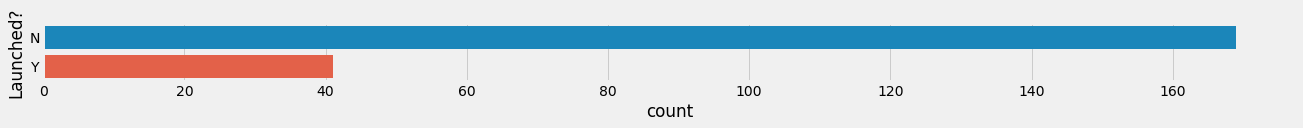

In [21]:
# How many rockets were launched?
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Launched?',data=train)
#sns.countplot(x='Launched?',data=train)             --> You can use this to get a vertical graph.
 
print(train['Launched?'].value_counts())             ##This will help us see the exact number along with the graph.

- So here we can see that the rockets launched (41) are far less than the ones that didn't (169). Thus, in the future when we run our test dataset and we get that the number of rockets that were launched is more, then that means that there something wrong.

In [22]:
# Let's add the 'Launched?' column to our subset dataframes.
df_bin['Launched?'] = train['Launched?']
df_con['Launched?'] = train['Launched?']

In [23]:
# Now we will assign the 'Y' values in the df_bin dataframe the values 1 and the 'N' values 0.
df_bin['Launched?'] = np.where(df_bin['Launched?'] == 'Y',1,0)

In [24]:
print('df_bin \n',df_bin.head())
print('')
print('')
print('df_con \n',df_con.head())

df_bin 
      Launched?
194          0
101          0
68           0
224          0
37           1


df_con 
     Launched?
194         N
101         N
68          N
224         N
37          Y


#### FEATURE 2: Crewed or Uncrewed
Description: Whether the launch was with passengers or not.

In [25]:
# How many missing values are there in Crewed or Uncrewed
train['Crewed or Uncrewed'].isnull().sum()

168

In [26]:
# Filling the missing values 
train['Crewed or Uncrewed'].fillna('Uncrewed', inplace= True)

In [27]:
# Is there any missing values now
train['Crewed or Uncrewed'].isnull().any()

False

Uncrewed    198
Crewed       12
Name: Crewed or Uncrewed, dtype: int64


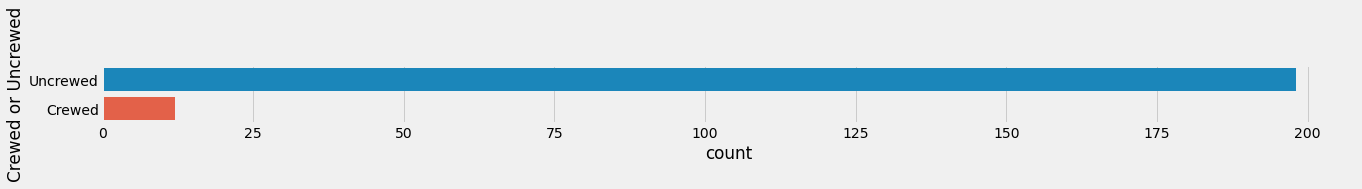

In [28]:
# How many rockets were either Crewed or Uncrewed
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Crewed or Uncrewed',data=train)
#sns.countplot(x='Crewed or Uncrewed',data=train)             --> You can use this to get a vertical graph.
 
print(train['Crewed or Uncrewed'].value_counts())             ##This will help us see the exact number along with the graph.

> Looks like most of the launches were planned to take place without crew members.

Since there are no more missing values we will add 'Crewed or Uncrewed' column to our subset dataframes. This is our first feature which is not a predictive variable.

In [29]:
# Let's add the 'Launched?' column to our subset dataframes.
df_bin['Crewed or Uncrewed'] = train['Crewed or Uncrewed']

# Now we will assign the 'Uncrewed' values in the df_bin dataframe the values 0 and the 'Crewed' values 1.
df_bin['Crewed or Uncrewed'] = np.where(df_bin['Crewed or Uncrewed'] == 'Uncrewed',0,1)

df_con['Crewed or Uncrewed'] = train['Crewed or Uncrewed']

In [30]:
print('df_bin \n',df_bin.head())
print('')
print('')
print('df_con \n',df_con.head())

df_bin 
      Launched?  Crewed or Uncrewed
194          0                   0
101          0                   0
68           0                   0
224          0                   0
37           1                   0


df_con 
     Launched? Crewed or Uncrewed
194         N           Uncrewed
101         N           Uncrewed
68          N           Uncrewed
224         N           Uncrewed
37          Y           Uncrewed


- #### Let's plot the Distribution
Why? We will look at the distribution of each feature to understand the spread there is across the dataset.

**For example: ** If the values are completely outside the distribution, then we may not want to include them in the model.

<AxesSubplot:xlabel='Crewed or Uncrewed', ylabel='Density'>

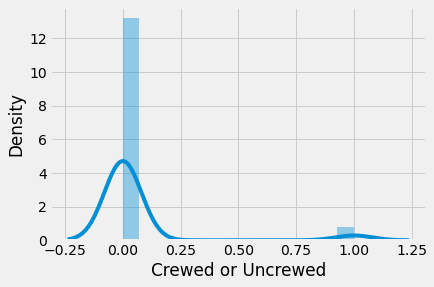

In [31]:
# .distplot tells us the distribution of a feature.
sns.distplot(df_bin['Crewed or Uncrewed'])

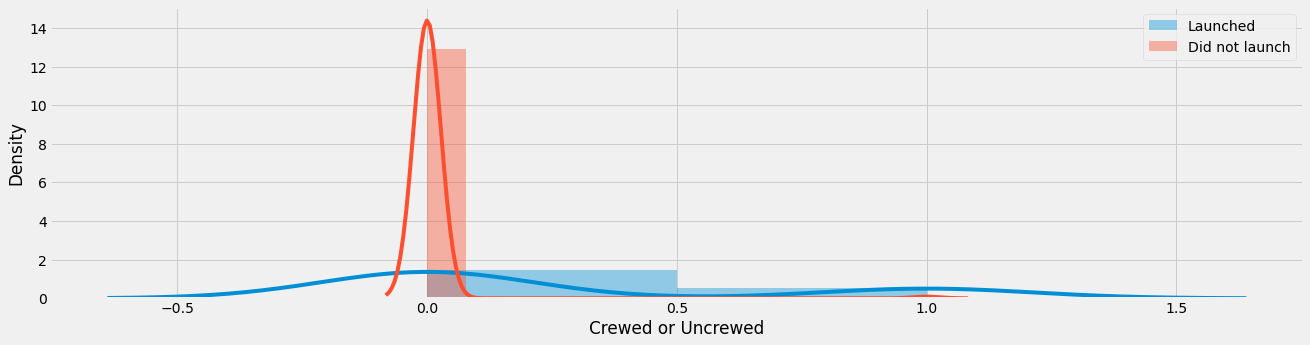

In [32]:
# Now let us compare the Crewed or Uncrewed variable with the launch variable and see how it looks.
# This can be done because both are binarys (0 or 1).
fig = plt.figure(figsize=(20,5))
sns.distplot(df_bin.loc[df_bin['Launched?'] == 1]['Crewed or Uncrewed'], label= 'Launched')
sns.distplot(df_bin.loc[df_bin['Launched?'] == 0]['Crewed or Uncrewed'], label= 'Did not launch')
plt.legend()
plt.show()

- So from the above plot one thing we can understand is that, if the rocket was uncrewed then the chances of a launch was less. As it is seen that the ratio of most of the launches failing is far less whan the mission is crewed.

#### FEATURE 3: Temperature
Description: Temperature at the time of launch.

<b> <i> Since there is only data about the temperature of launch for a successful launch, what we will do is create column called "Temperature" and take the average temperature of the days the launch didn't take place and the actual temperature of the days the launch was successful. </i> </b>

In [33]:
# Adding values to the newly created Temperature column
train['Temperature'] = train['Temp at Launch Time']
train['Temperature'].fillna(train['Ave Temp'],inplace= True)

In [34]:
train.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes,Temperature
194,Voyager 2,22-Aug-77,NaN,Cape Canaveral,Uncrewed,N,88.0,0.0,76.14,NaN,90.0,73.0,82.00,0.0,0.25,W,20.0,10.0,NaN,NaN,NaN,29.96,NaN,12:57,Cloudy,NaN,76.14
101,Mariner 8,8-May-71,NaN,Cape Canaveral,Uncrewed,N,82.0,64.0,73.58,NaN,82.0,64.0,73.58,0.0,0.09,NE,21.0,7.0,NaN,NaN,NaN,29.92,NaN,13:25,Fair,NaN,73.58
68,Surveyor 3,18-Apr-67,NaN,Cape Canaveral,Uncrewed,N,81.0,0.0,62.32,NaN,81.0,60.0,71.00,0.0,0.07,W,24.0,10.0,NaN,NaN,NaN,29.81,NaN,12:54,Cloudy,NaN,62.32
224,Apollo 7,13-Oct-68,NaN,Cape Canaveral,Uncrewed,N,78.0,60.0,69.68,NaN,85.0,69.0,77.00,0.0,0.16,N,17.0,15.0,NaN,NaN,NaN,30.17,NaN,11:32,Partly Cloudy,NaN,69.68
37,Ranger 6,30-Jan-64,11:49,Cape Canaveral,Uncrewed,Y,74.0,44.0,58.74,54.0,72.0,50.0,61.00,0.0,0.08,W,15.0,20.0,12.0,NaN,NaN,30.11,NaN,10:49,Fair,NaN,54.00


In [35]:
# How many missing values are there in the Temperature column
train['Temperature'].isnull().sum()

1

In [36]:
# Which is the missing value?
train[pd.isnull(train['Temperature'])]

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes,Temperature
142,Dawn,27-Sep-07,12:34,Cape Canaveral,Uncrewed,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> This row is of no use as there is no data available. Thus we can remove this. While removing we need to remember that it needs to be removed from both the subset dataframes.

In [37]:
# Dropping from the train dataset.
train.drop(axis= 0, index= 142, inplace= True)

# Dropping from the subset dataframes
df_bin.drop(index= 142, inplace= True)
df_con.drop(index= 142, inplace= True)

In [38]:
# Checking missing values in the Temperature column
train['Temperature'].isnull().sum()

0

<AxesSubplot:xlabel='count', ylabel='Temperature'>

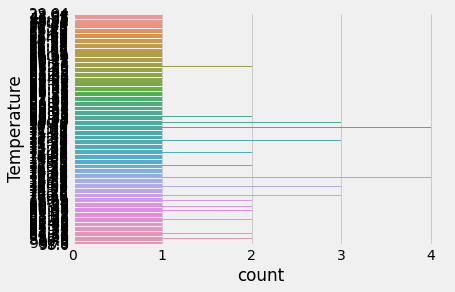

In [39]:
# What are the different temperatures.
sns.countplot(y='Temperature',data=train)

This plot doesn't make much sense does it? So we will make it look a bit better in the following steps.

Since our Temperature is a float, let's add it to our continuous subset dataframe. But to add to the categorical subset dataframe we will be cutting it to bins.

In [40]:
# Add Temperature to our sbset dataframes
df_con['Temperature'] = train['Temperature']                  # --> Continuous

df_bin['Temperature'] = pd.cut(train['Temperature'], bins= 3)  # --> Discretised

***Here we cut the Fare in discretised dataframe to equal bins using pd.cut***
- Check this link for better understanding https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

In [41]:
print('df_bin \n',df_bin.head())
print('')
print('')
print('df_con \n',df_con.head())

df_bin 
      Launched?  Crewed or Uncrewed       Temperature
194          0                   0    (75.013, 98.0]
101          0                   0  (52.027, 75.013]
68           0                   0  (52.027, 75.013]
224          0                   0  (52.027, 75.013]
37           1                   0  (52.027, 75.013]


df_con 
     Launched? Crewed or Uncrewed  Temperature
194         N           Uncrewed        76.14
101         N           Uncrewed        73.58
68          N           Uncrewed        62.32
224         N           Uncrewed        69.68
37          Y           Uncrewed        54.00


- Here we can see that the Temperatures for the discretised dataframe is between intervals. 

- In the continuous dataframe we can see the Temperature exactly as it is.

In [42]:
df_bin['Temperature'].value_counts()

(52.027, 75.013]    113
(75.013, 98.0]       82
(28.971, 52.027]     14
Name: Temperature, dtype: int64

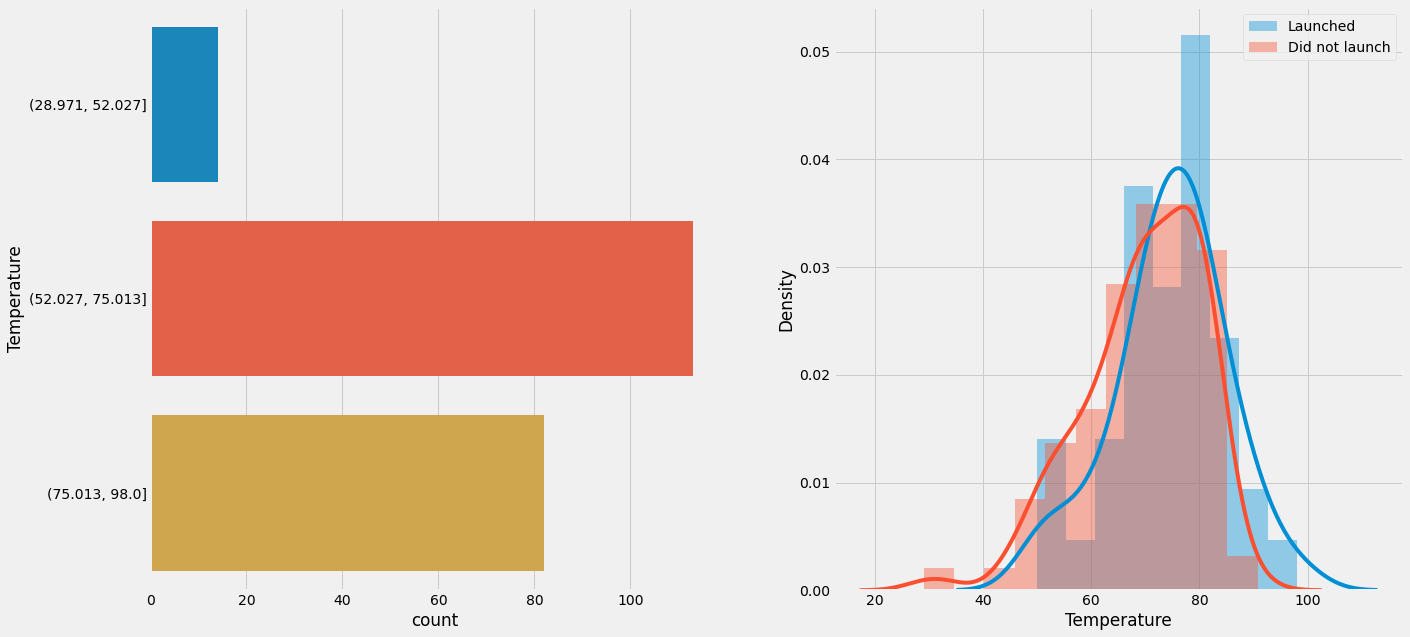

In [43]:
# Plot counts and distributions of Launched and Temperature variables side by side. 
fig = plt.figure(figsize= (20,10))

plt.subplot(1,2,1)
sns.countplot(y= 'Temperature', data= df_bin)

plt.subplot(1,2,2)
sns.distplot(train.loc[train['Launched?'] == 'Y']['Temperature'], label= 'Launched')
sns.distplot(train.loc[train['Launched?'] == 'N']['Temperature'], label= 'Did not launch')

plt.legend()
plt.show()

- It looks like there is a more chance of for the rockets to launch when the temperature is in between 78 and 98.

> Initially we kept the bins at 5, but then since there were bins with less values, we reduced it. We saw a similar output as that of bins= 5 with 4 as well, so we chose 3.

#### FEATURE 4: Precipitation 

<b> Even if there is no lightning around the launch pad, any type of precipitation can force a launch to be scrubbed. </b>

In [44]:
# How many missing values are there?
train['Percipitation at Launch Time'].isnull().sum()

0

Since there are no more missing values we will add 'Percipitation at Launch Time' column to our subset dataframes. 

In [45]:
# Let's add the 'Percipitation' column to our subset dataframes.
df_bin['Percipitation'] = train['Percipitation at Launch Time']
df_con['Percipitation'] = train['Percipitation at Launch Time']

In [46]:
print('df_bin \n',df_bin.head())
print('')
print('')
print('df_con \n',df_con.head())

df_bin 
      Launched?  Crewed or Uncrewed       Temperature  Percipitation
194          0                   0    (75.013, 98.0]            0.0
101          0                   0  (52.027, 75.013]            0.0
68           0                   0  (52.027, 75.013]            0.0
224          0                   0  (52.027, 75.013]            0.0
37           1                   0  (52.027, 75.013]            0.0


df_con 
     Launched? Crewed or Uncrewed  Temperature  Percipitation
194         N           Uncrewed        76.14            0.0
101         N           Uncrewed        73.58            0.0
68          N           Uncrewed        62.32            0.0
224         N           Uncrewed        69.68            0.0
37          Y           Uncrewed        54.00            0.0


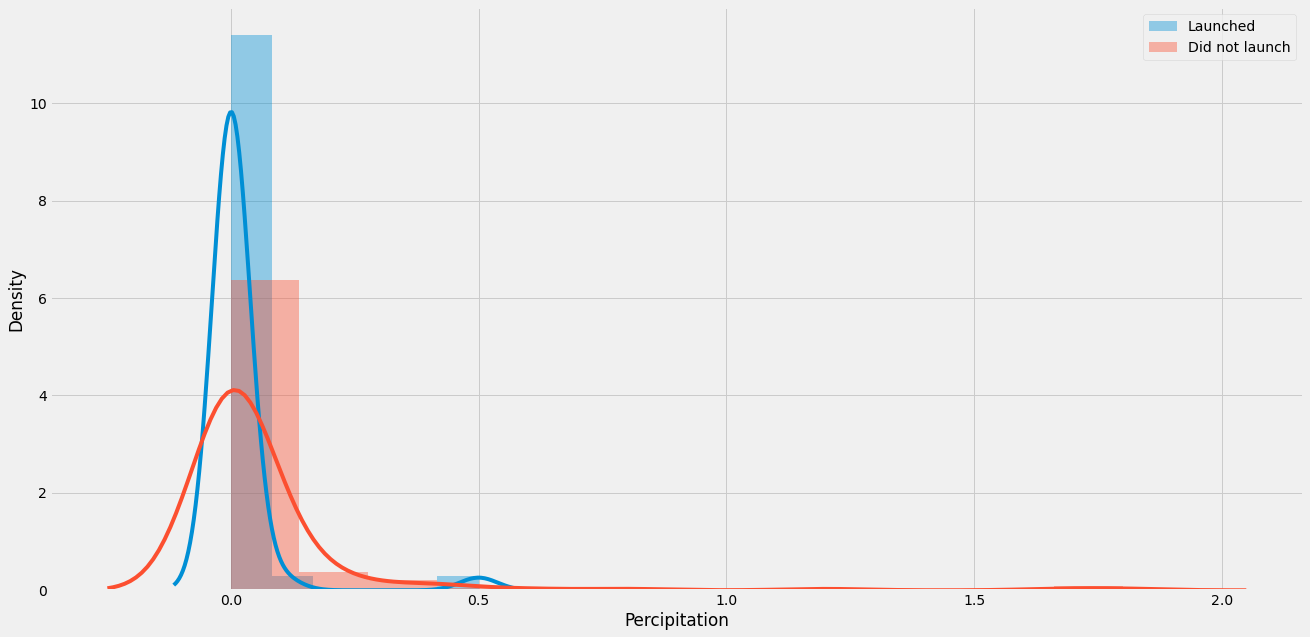

In [47]:
# Now let us compare the Percipitation variable with the launch variable and see how it looks.
fig = plt.figure(figsize=(20,10))

sns.distplot(df_bin.loc[df_bin['Launched?'] == 1]['Percipitation'], label= 'Launched')
sns.distplot(df_bin.loc[df_bin['Launched?'] == 0]['Percipitation'], label= 'Did not launch')
plt.legend()
plt.show()

- Thus, from the above plot we can conclude that the launch was more successful when the percipitation was either 0 (No Percipitation) or 0.5 (A small Percipitation).

#### FEATURE 5: Wind Direction
Description: The direction of the wind.

Key: E = East, NE = North East, N = North, SE = South East, W = West, NW = North West, S = South, SW = South West

In [48]:
# How many missing values are there?
train['Wind Direction'].isnull().sum()

0

Since there are no more missing values we will add 'Wind Direction' column to our subset dataframes. 

In [49]:
# Let's add the 'Wind Direction' column to our subset dataframes.
df_bin['Wind Direction'] = train['Wind Direction']
df_con['Wind Direction'] = train['Wind Direction']

In [50]:
print('df_bin \n',df_bin.head())
print('')
print('')
print('')
print('')
print('df_con \n',df_con.head())

df_bin 
      Launched?  Crewed or Uncrewed       Temperature  Percipitation  \
194          0                   0    (75.013, 98.0]            0.0   
101          0                   0  (52.027, 75.013]            0.0   
68           0                   0  (52.027, 75.013]            0.0   
224          0                   0  (52.027, 75.013]            0.0   
37           1                   0  (52.027, 75.013]            0.0   

    Wind Direction  
194              W  
101             NE  
68               W  
224              N  
37               W  




df_con 
     Launched? Crewed or Uncrewed  Temperature  Percipitation Wind Direction
194         N           Uncrewed        76.14            0.0              W
101         N           Uncrewed        73.58            0.0             NE
68          N           Uncrewed        62.32            0.0              W
224         N           Uncrewed        69.68            0.0              N
37          Y           Uncrewed        54.00

E     61
W     36
NE    29
SE    27
NW    22
S     14
N     12
SW     8
Name: Wind Direction, dtype: int64


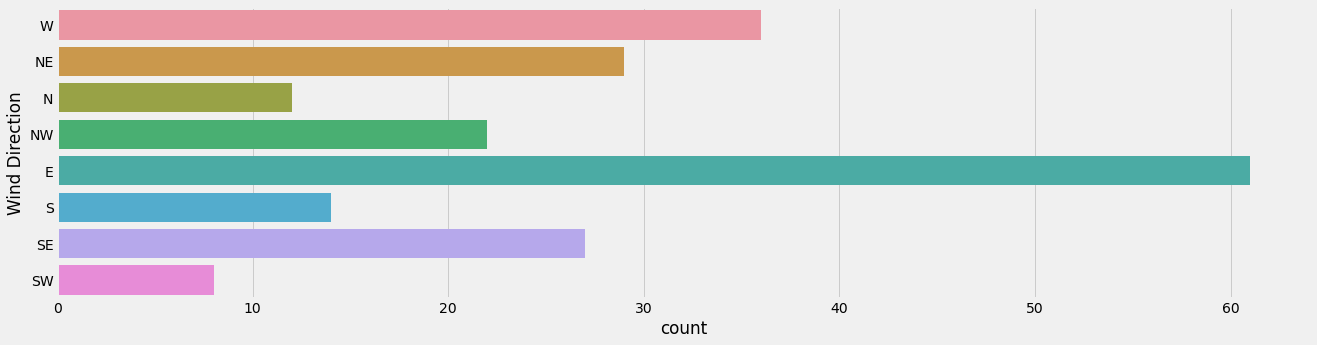

In [51]:
# How were the wind directions during most days?
fig = plt.figure(figsize=(20,5))
sns.countplot(y='Wind Direction',data=train)
 
print(train['Wind Direction'].value_counts())             ##This will help us see the exact number along with the graph.

- We can see that most of the time/days the wind direction was towards the east.

#### FEATURE 6: Wind Speed
Description: The speed of the wind at the time of launch.

<b> <i> Since there is only data about the Wind Speed at the time of launch for a successful launch, what we will do is create column called "Wind Speed" and take the Maximum Wind Speed of the days the launch didn't take place and the Wind Speed at Launch Time of the days the launch was successful. </i> </b>

In [52]:
# Adding values to the newly created Wind Speed column
train['Wind Speed'] = train['Wind Speed at Launch Time']
train['Wind Speed'].fillna(train['Max Wind Speed'],inplace= True)

In [53]:
train.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes,Temperature,Wind Speed
194,Voyager 2,22-Aug-77,NaN,Cape Canaveral,Uncrewed,N,88.0,0.0,76.14,NaN,90.0,73.0,82.00,0.0,0.25,W,20.0,10.0,NaN,NaN,NaN,29.96,NaN,12:57,Cloudy,NaN,76.14,20.0
101,Mariner 8,8-May-71,NaN,Cape Canaveral,Uncrewed,N,82.0,64.0,73.58,NaN,82.0,64.0,73.58,0.0,0.09,NE,21.0,7.0,NaN,NaN,NaN,29.92,NaN,13:25,Fair,NaN,73.58,21.0
68,Surveyor 3,18-Apr-67,NaN,Cape Canaveral,Uncrewed,N,81.0,0.0,62.32,NaN,81.0,60.0,71.00,0.0,0.07,W,24.0,10.0,NaN,NaN,NaN,29.81,NaN,12:54,Cloudy,NaN,62.32,24.0
224,Apollo 7,13-Oct-68,NaN,Cape Canaveral,Uncrewed,N,78.0,60.0,69.68,NaN,85.0,69.0,77.00,0.0,0.16,N,17.0,15.0,NaN,NaN,NaN,30.17,NaN,11:32,Partly Cloudy,NaN,69.68,17.0
37,Ranger 6,30-Jan-64,11:49,Cape Canaveral,Uncrewed,Y,74.0,44.0,58.74,54.0,72.0,50.0,61.00,0.0,0.08,W,15.0,20.0,12.0,NaN,NaN,30.11,NaN,10:49,Fair,NaN,54.00,12.0


In [54]:
# How many missing values are there?
train['Wind Speed'].isnull().sum()

0

<AxesSubplot:xlabel='count', ylabel='Wind Speed'>

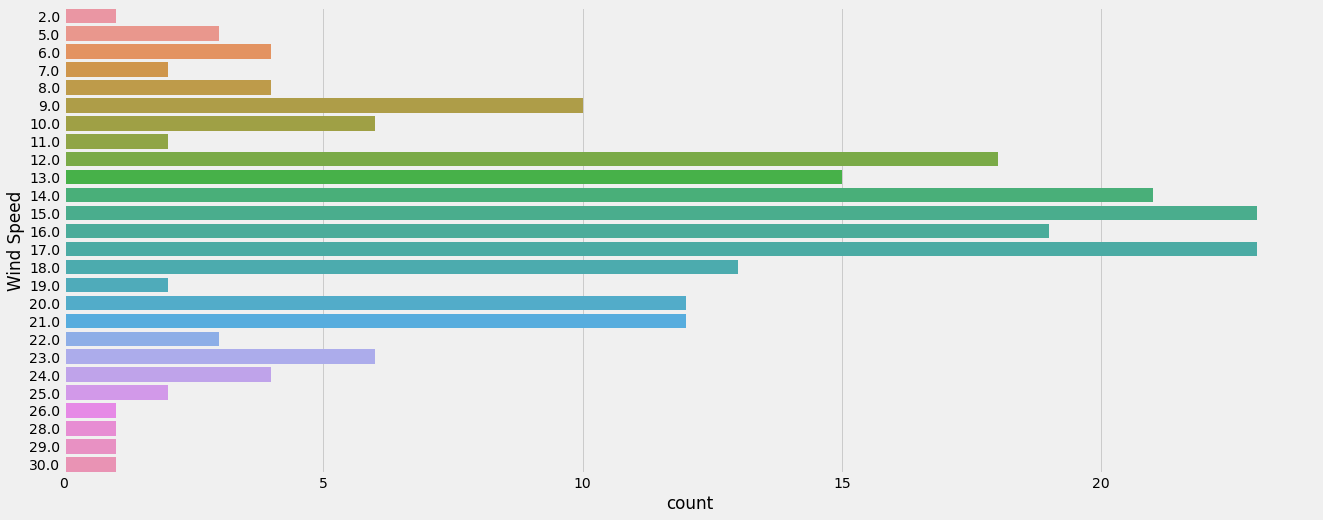

In [55]:
# What are the different wind speeds recorded?
fig = plt.figure(figsize=(20,8))
sns.countplot(y= 'Wind Speed', data= train)

In [56]:
# Unique values in the 'Wind Speed' column
print(train['Wind Speed'].unique())
print('\n')
print('Total number of unique values: ',len(train['Wind Speed'].unique()))

[20. 21. 24. 17. 12. 23.  8.  9. 19. 18. 14. 15. 10. 13. 11. 16. 25.  7.
  5. 30.  6. 29. 28. 22. 26.  2.]


Total number of unique values:  26


Since there are no more missing values we will add 'Max Wind Speed' column to our subset dataframes. 

Since our 'Max Wind Speed is a float, let's add it to our continuous subset dataframe. But to add to the categorical subset dataframe we will be cutting it to bins.

In [57]:
# Let's add the 'Wind Speed' column to our subset dataframes.
df_bin['Wind Speed'] = pd.cut(train['Wind Speed'], bins= 4)

df_con['Wind Speed'] = train['Wind Speed']

In [58]:
print('df_bin \n',df_bin.head())
print('')
print('')
print('')
print('')
print('df_con \n',df_con.head())

df_bin 
      Launched?  Crewed or Uncrewed       Temperature  Percipitation  \
194          0                   0    (75.013, 98.0]            0.0   
101          0                   0  (52.027, 75.013]            0.0   
68           0                   0  (52.027, 75.013]            0.0   
224          0                   0  (52.027, 75.013]            0.0   
37           1                   0  (52.027, 75.013]            0.0   

    Wind Direction    Wind Speed  
194              W  (16.0, 23.0]  
101             NE  (16.0, 23.0]  
68               W  (23.0, 30.0]  
224              N  (16.0, 23.0]  
37               W   (9.0, 16.0]  




df_con 
     Launched? Crewed or Uncrewed  Temperature  Percipitation Wind Direction  \
194         N           Uncrewed        76.14            0.0              W   
101         N           Uncrewed        73.58            0.0             NE   
68          N           Uncrewed        62.32            0.0              W   
224         N           U

- Here we can see that the Wind Speed for the discretised dataframe is between intervals. 

- In the continuous dataframe we can see the Wind Speed exactly as it is.

In [59]:
df_bin['Wind Speed'].value_counts()

(9.0, 16.0]     104
(16.0, 23.0]     71
(1.972, 9.0]     24
(23.0, 30.0]     10
Name: Wind Speed, dtype: int64

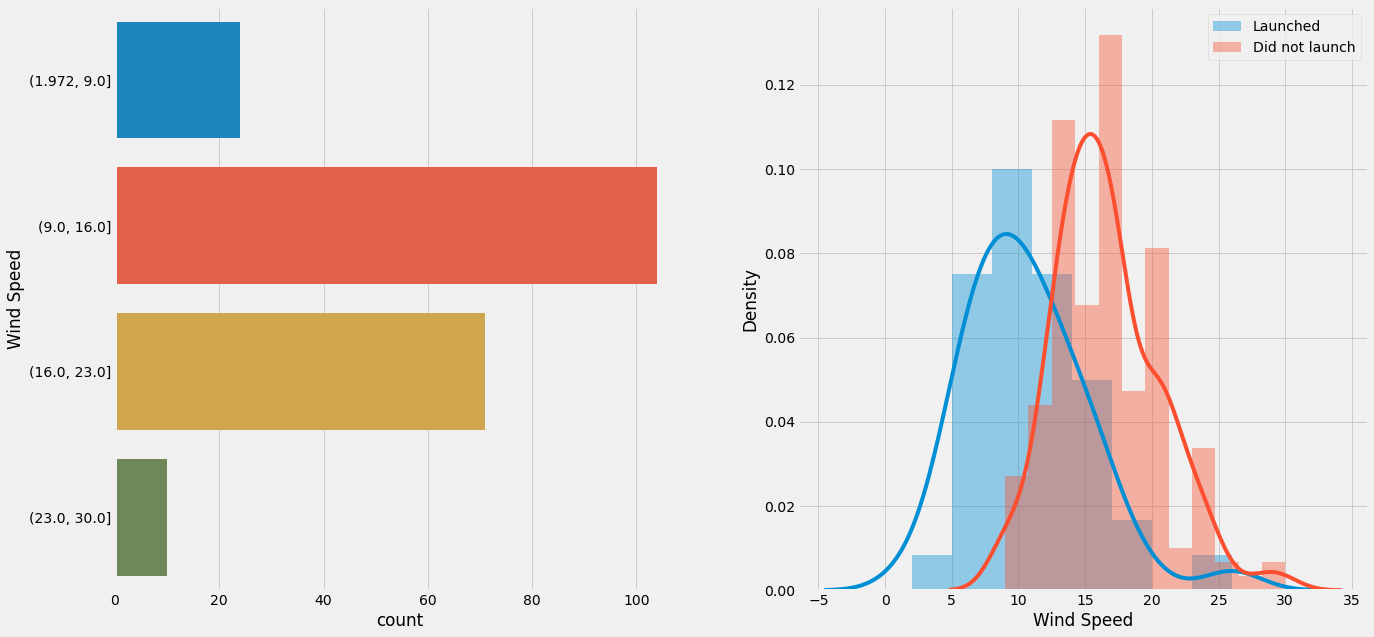

In [60]:
# Plot counts and distributions of Launched and Temperature variables side by side. 
fig = plt.figure(figsize= (20,10))

plt.subplot(1,2,1)
sns.countplot(y= 'Wind Speed', data= df_bin)

plt.subplot(1,2,2)
sns.distplot(train.loc[train['Launched?'] == 'Y']['Wind Speed'], label= 'Launched')
sns.distplot(train.loc[train['Launched?'] == 'N']['Wind Speed'], label= 'Did not launch')

plt.legend()
plt.show()

- It looks like there is a higher chance for the rockets to launch when the wind speed decreases.

> We have kept our bins as 4. It can be kept at 3 as well but I chose to keep it at 4 because when the bins are at 3 it looks a lot crowded.

#### FEATURE 7: Sea Level Pressure
Description: The atmospheric pressure at sea level.

In [61]:
train.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes,Temperature,Wind Speed
194,Voyager 2,22-Aug-77,NaN,Cape Canaveral,Uncrewed,N,88.0,0.0,76.14,NaN,90.0,73.0,82.00,0.0,0.25,W,20.0,10.0,NaN,NaN,NaN,29.96,NaN,12:57,Cloudy,NaN,76.14,20.0
101,Mariner 8,8-May-71,NaN,Cape Canaveral,Uncrewed,N,82.0,64.0,73.58,NaN,82.0,64.0,73.58,0.0,0.09,NE,21.0,7.0,NaN,NaN,NaN,29.92,NaN,13:25,Fair,NaN,73.58,21.0
68,Surveyor 3,18-Apr-67,NaN,Cape Canaveral,Uncrewed,N,81.0,0.0,62.32,NaN,81.0,60.0,71.00,0.0,0.07,W,24.0,10.0,NaN,NaN,NaN,29.81,NaN,12:54,Cloudy,NaN,62.32,24.0
224,Apollo 7,13-Oct-68,NaN,Cape Canaveral,Uncrewed,N,78.0,60.0,69.68,NaN,85.0,69.0,77.00,0.0,0.16,N,17.0,15.0,NaN,NaN,NaN,30.17,NaN,11:32,Partly Cloudy,NaN,69.68,17.0
37,Ranger 6,30-Jan-64,11:49,Cape Canaveral,Uncrewed,Y,74.0,44.0,58.74,54.0,72.0,50.0,61.00,0.0,0.08,W,15.0,20.0,12.0,NaN,NaN,30.11,NaN,10:49,Fair,NaN,54.00,12.0


In [62]:
# How many missing values are there?
train['Sea Level Pressure'].isnull().sum()

0

<AxesSubplot:xlabel='count', ylabel='Sea Level Pressure'>

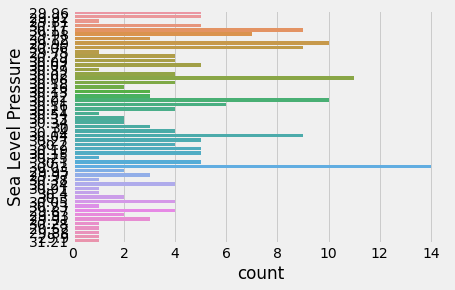

In [63]:
# What are the different Sea Level Pressures?
sns.countplot(y= 'Sea Level Pressure', data= train)

In [64]:
# Unique values in the 'Sea Level Pressure' column
print(train['Sea Level Pressure'].unique())
print('\n')
print('Total number of unique values: ',len(train['Sea Level Pressure'].unique()))

['29.96' '29.92' '29.81' '30.17' '30.11' '29.98' '30.12' '29.99' '30.06'
 '29.75' '30.29' '30.09' '30.07' '30.39' '30.02' '30.08' '30.18' '30.26'
 '30.13' '30.22' '30.01' '30.16' '30.21' '30.54' '30.33' '30.34' '30'
 '30.14' '30.04' '30.27' '30.2' '30.19' '30.15' '30.25' '30.1' '30.03'
 '29.95' '29.97' '30.38' '30.24' '30.91' '30.4' '30.3' '30.05' '30.23'
 '29.87' '29.93' '29.91' '30.28' '20:52' '29.88' '29.9' '31.21']


Total number of unique values:  53


Since there are no more missing values we will add 'Sea Level Pressure' column to our subset dataframes. 

**Let's add the 'Sea Level Pressure' column to our subset dataframes.**
**Here the values in the 'Sea Level Pressure' column are strings/objects so we convert thwm to floats using .astype()**

****df_con['Sea Level Pressure'] = train['Sea Level Pressure'].astype(float) ***               

***df_bin['Sea Level Pressure'] = pd.cut(train['Sea Level Pressure'].astype(float), bins= 5)***

**Here we will get the error ValueError**                                
<br></br>

'''
Traceback (most recent call last)
<ipython-input-65-02c48c992497> in <module>
      1 # Let's add the 'Sea Level Pressure' column to our subset dataframes.
      2 # Here the values in the 'Sea Level Pressure' column are strings/objects so we convert thwm to floats using .astype()
----> 3 df_con['Sea Level Pressure'] = train['Sea Level Pressure'].astype(float)
      4 
      5 df_bin['Sea Level Pressure'] = pd.cut(train['Sea Level Pressure'].astype(float), bins= 5)

D:\USER\Downloads\Anaconda\lib\site-packages\pandas\core\generic.py in astype(self, dtype, copy, errors)
   5544         else:
   5545             # else, only a single dtype is given
-> 5546             new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors,)
   5547             return self._constructor(new_data).__finalize__(self, method="astype")
   5548 

D:\USER\Downloads\Anaconda\lib\site-packages\pandas\core\internals\managers.py in astype(self, dtype, copy, errors)
    593         self, dtype, copy: bool = False, errors: str = "raise"
    594     ) -> "BlockManager":
--> 595         return self.apply("astype", dtype=dtype, copy=copy, errors=errors)
    596 
    597     def convert(

D:\USER\Downloads\Anaconda\lib\site-packages\pandas\core\internals\managers.py in apply(self, f, align_keys, **kwargs)
    404                 applied = b.apply(f, **kwargs)
    405             else:
--> 406                 applied = getattr(b, f)(**kwargs)
    407             result_blocks = _extend_blocks(applied, result_blocks)
    408 

D:\USER\Downloads\Anaconda\lib\site-packages\pandas\core\internals\blocks.py in astype(self, dtype, copy, errors)
    593             vals1d = values.ravel()
    594             try:
--> 595                 values = astype_nansafe(vals1d, dtype, copy=True)
    596             except (ValueError, TypeError):
    597                 # e.g. astype_nansafe can fail on object-dtype of strings

D:\USER\Downloads\Anaconda\lib\site-packages\pandas\core\dtypes\cast.py in astype_nansafe(arr, dtype, copy, skipna)
    993     if copy or is_object_dtype(arr) or is_object_dtype(dtype):
    994         # Explicit copy, or required since NumPy can't view from / to object.
--> 995         return arr.astype(dtype, copy=True)
    996 
    997     return arr.view(dtype)

ValueError: could not convert string to float: '20:52' '''
<br></br>

**I am showing this error here so that it can be useful for others as well.**

In [65]:
# Function to clean our 'Sea Level Pressure' column.
def cleaning(value):
    if ":" in value:
        point = value.replace(":", ".")
        return float(point)
    else:
        return float(value)

In [66]:
train['Sea Level Pressure'] = train['Sea Level Pressure'].apply(cleaning)

In [67]:
# Let's add the 'Sea Level Pressure' column to our subset dataframes.
df_con['Sea Level Pressure'] = train['Sea Level Pressure']                

df_bin['Sea Level Pressure'] = train['Sea Level Pressure']

In [68]:
print('df_bin \n',df_bin.head())
print('')
print('')
print('')
print('')
print('df_con \n',df_con.head())

df_bin 
      Launched?  Crewed or Uncrewed       Temperature  Percipitation  \
194          0                   0    (75.013, 98.0]            0.0   
101          0                   0  (52.027, 75.013]            0.0   
68           0                   0  (52.027, 75.013]            0.0   
224          0                   0  (52.027, 75.013]            0.0   
37           1                   0  (52.027, 75.013]            0.0   

    Wind Direction    Wind Speed  Sea Level Pressure  
194              W  (16.0, 23.0]               29.96  
101             NE  (16.0, 23.0]               29.92  
68               W  (23.0, 30.0]               29.81  
224              N  (16.0, 23.0]               30.17  
37               W   (9.0, 16.0]               30.11  




df_con 
     Launched? Crewed or Uncrewed  Temperature  Percipitation Wind Direction  \
194         N           Uncrewed        76.14            0.0              W   
101         N           Uncrewed        73.58            0.0   

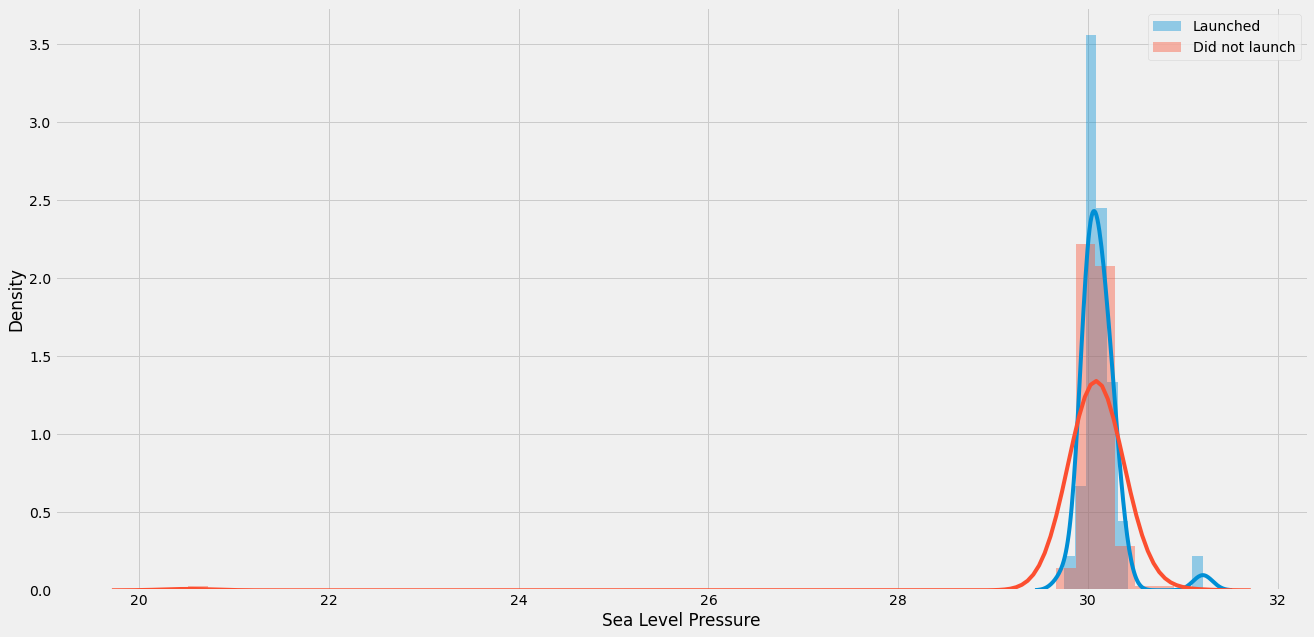

In [69]:
# Plot distribution of Launched and Sea Level Pressure variables side by side. 
fig = plt.figure(figsize= (20,10))

sns.distplot(df_bin.loc[df_bin['Launched?'] == 1]['Sea Level Pressure'], label= 'Launched')
sns.distplot(df_bin.loc[df_bin['Launched?'] == 0]['Sea Level Pressure'], label= 'Did not launch')

plt.legend()
plt.show()

- Thus from the above plot we can see that as the Sea level pressure increases there is a higher chance for the launch to be successful.

#### FEATURE 8: Condition
Description: The climatic condition during the day registered.

In [70]:
# How many missing values are there?
train['Condition'].isnull().sum()

0

<AxesSubplot:xlabel='count', ylabel='Condition'>

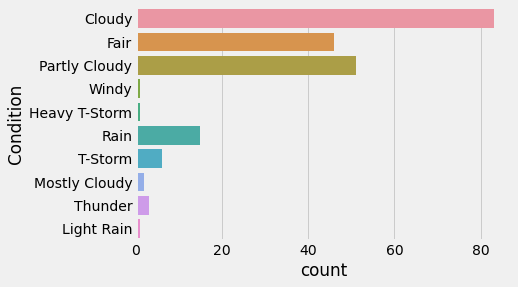

In [71]:
# What are the different Conditions?
sns.countplot(y= 'Condition', data= train)

Since there are no more missing values we will add 'Condition' column to our subset dataframes. 

In [72]:
# Let's add the 'Condition' column to our subset dataframes.
df_con['Condition'] = train['Condition']                
df_bin['Condition'] = train['Condition']

In [73]:
print('df_bin \n',df_bin.head())
print('')
print('')
print('')
print('')
print('df_con \n',df_con.head())

df_bin 
      Launched?  Crewed or Uncrewed       Temperature  Percipitation  \
194          0                   0    (75.013, 98.0]            0.0   
101          0                   0  (52.027, 75.013]            0.0   
68           0                   0  (52.027, 75.013]            0.0   
224          0                   0  (52.027, 75.013]            0.0   
37           1                   0  (52.027, 75.013]            0.0   

    Wind Direction    Wind Speed  Sea Level Pressure      Condition  
194              W  (16.0, 23.0]               29.96         Cloudy  
101             NE  (16.0, 23.0]               29.92           Fair  
68               W  (23.0, 30.0]               29.81         Cloudy  
224              N  (16.0, 23.0]               30.17  Partly Cloudy  
37               W   (9.0, 16.0]               30.11           Fair  




df_con 
     Launched? Crewed or Uncrewed  Temperature  Percipitation Wind Direction  \
194         N           Uncrewed        76.14       

<br></br>
## 3. Feature Encoding

Now since our two sub dataframes are ready, we can feature encode them so that they are ready for our machine learning models.
- We will encode our bin dataframe (df_bin) with "One-Hot Encoding" and our continuous dataframe (df_con) with "Label Encoding".

***Discretised Dataframe***

In [74]:
df_bin.head()

,Launched?,Crewed or Uncrewed,Temperature,Percipitation,Wind Direction,Wind Speed,Sea Level Pressure,Condition
194,0,0,"(75.013, 98.0]",0.0,W,"(16.0, 23.0]",29.96,Cloudy
101,0,0,"(52.027, 75.013]",0.0,NE,"(16.0, 23.0]",29.92,Fair
68,0,0,"(52.027, 75.013]",0.0,W,"(23.0, 30.0]",29.81,Cloudy
224,0,0,"(52.027, 75.013]",0.0,N,"(16.0, 23.0]",30.17,Partly Cloudy
37,1,0,"(52.027, 75.013]",0.0,W,"(9.0, 16.0]",30.11,Fair


- One hot encoding is giving a 0 for what the value isnt and a 1 for what it is.

In [75]:
# One Hot Encoded df_bin variables
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Launched?')                             # --> Here we remove 'Launched?' because we dont need encode this.
df_bin_enc = pd.get_dummies(df_bin, columns= one_hot_cols)

df_bin_enc.head()

,Launched?,Crewed or Uncrewed_0,Crewed or Uncrewed_1,"Temperature_(28.971, 52.027]","Temperature_(52.027, 75.013]","Temperature_(75.013, 98.0]",Percipitation_0.0,Percipitation_0.01,Percipitation_0.02,Percipitation_0.03,Percipitation_0.04,Percipitation_0.05,Percipitation_0.08,Percipitation_0.1,Percipitation_0.12,Percipitation_0.14,Percipitation_0.15,Percipitation_0.16,Percipitation_0.2,Percipitation_0.21,Percipitation_0.28,Percipitation_0.3,Percipitation_0.4,Percipitation_0.46,Percipitation_0.5,Percipitation_0.6,Percipitation_0.8,Percipitation_1.2,Percipitation_1.68,Percipitation_1.8,Wind Direction_E,Wind Direction_N,Wind Direction_NE,Wind Direction_NW,Wind Direction_S,Wind Direction_SE,Wind Direction_SW,Wind Direction_W,"Wind Speed_(1.972, 9.0]","Wind Speed_(9.0, 16.0]","Wind Speed_(16.0, 23.0]","Wind Speed_(23.0, 30.0]",Sea Level Pressure_20.52,Sea Level Pressure_29.75,Sea Level Pressure_29.81,Sea Level Pressure_29.87,Sea Level Pressure_29.88,Sea Level Pressure_29.9,Sea Level Pressure_29.91,Sea Level Pressure_29.92,Sea Level Pressure_29.93,Sea Level Pressure_29.95,Sea Level Pressure_29.96,Sea Level Pressure_29.97,Sea Level Pressure_29.98,Sea Level Pressure_29.99,Sea Level Pressure_30.0,Sea Level Pressure_30.01,Sea Level Pressure_30.02,Sea Level Pressure_30.03,Sea Level Pressure_30.04,Sea Level Pressure_30.05,Sea Level Pressure_30.06,Sea Level Pressure_30.07,Sea Level Pressure_30.08,Sea Level Pressure_30.09,Sea Level Pressure_30.1,Sea Level Pressure_30.11,Sea Level Pressure_30.12,Sea Level Pressure_30.13,Sea Level Pressure_30.14,Sea Level Pressure_30.15,Sea Level Pressure_30.16,Sea Level Pressure_30.17,Sea Level Pressure_30.18,Sea Level Pressure_30.19,Sea Level Pressure_30.2,Sea Level Pressure_30.21,Sea Level Pressure_30.22,Sea Level Pressure_30.23,Sea Level Pressure_30.24,Sea Level Pressure_30.25,Sea Level Pressure_30.26,Sea Level Pressure_30.27,Sea Level Pressure_30.28,Sea Level Pressure_30.29,Sea Level Pressure_30.3,Sea Level Pressure_30.33,Sea Level Pressure_30.34,Sea Level Pressure_30.38,Sea Level Pressure_30.39,Sea Level Pressure_30.4,Sea Level Pressure_30.54,Sea Level Pressure_30.91,Sea Level Pressure_31.21,Condition_Cloudy,Condition_Fair,Condition_Heavy T-Storm,Condition_Light Rain,Condition_Mostly Cloudy,Condition_Partly Cloudy,Condition_Rain,Condition_T-Storm,Condition_Thunder,Condition_Windy
194,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
101,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
68,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
224,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
37,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


***Continuous Dataframe***

In [76]:
df_con.head()

,Launched?,Crewed or Uncrewed,Temperature,Percipitation,Wind Direction,Wind Speed,Sea Level Pressure,Condition
194,N,Uncrewed,76.14,0.0,W,20.0,29.96,Cloudy
101,N,Uncrewed,73.58,0.0,NE,21.0,29.92,Fair
68,N,Uncrewed,62.32,0.0,W,24.0,29.81,Cloudy
224,N,Uncrewed,69.68,0.0,N,17.0,30.17,Partly Cloudy
37,Y,Uncrewed,54.00,0.0,W,12.0,30.11,Fair


In [77]:
# Label Encoded using LabelEncoder()                         
df_con_enc = df_con.apply(LabelEncoder().fit_transform)

df_con_enc.head()

,Launched?,Crewed or Uncrewed,Temperature,Percipitation,Wind Direction,Wind Speed,Sea Level Pressure,Condition
194,0,1,123,0,7,16,10,0
101,0,1,106,0,2,17,7,1
68,0,1,44,0,7,20,2,0
224,0,1,84,0,1,13,31,5
37,1,1,20,0,7,8,25,1


<br></br>
## 4. Start Building Maching Learning Models

Before running a ML model our aim was to turn all values to numbers. We will now run a series of machine learning algorithm to see which will yield the best results.

In [78]:
# For our simplicity we will be using the continuous dataframe.
selected = df_con_enc

In [79]:
# Split the dataframe into features (predictive variables) and labels (target variable).
X_train = selected.drop('Launched?', axis= 1)      # --> Features
y_train = selected['Launched?']                    # --> Label   

In [80]:
X_train.head()

,Crewed or Uncrewed,Temperature,Percipitation,Wind Direction,Wind Speed,Sea Level Pressure,Condition
194,1,123,0,7,16,10,0
101,1,106,0,2,17,7,1
68,1,44,0,7,20,2,0
224,1,84,0,1,13,31,5
37,1,20,0,7,8,25,1


In [81]:
y_train.head()

194    0
101    0
68     0
224    0
37     1
Name: Launched?, dtype: int32

### Algorithms
From here, we will be running the following algorithms.

- Logistic Regression
- KNN
- Naive Bayes
- Stochastic Gradient Decent
- Linear SVC
- Decision Tree
- Gradient Boosted Trees
- Random Forest
- CatBoost Algorithm

In any model building, we mainly focus on 3 main steps:

- Fitting the model and finding the accuracy (accuracy score) of the fitted model.
- Perform K-Fold Cross Validation (K needs to be specified).
- Find the accuracy of the Cross Validation. 

**We will be running a whole bunch of models to figure out which model is best suited for our data.**

In [82]:
# For our simplicity let us create a function that we can call for each model.
def ML_algo(algo, X_train, y_train, cv):
    
    ## Step 1:
    model = algo.fit(X_train, y_train)                          # Creating the model. We will fit the algorithm to the training data.
    accuracy = round(model.score(X_train, y_train)*100, 2)

    ## Step 2:  --> This code performs Cross Validation automatically.
    train_pred = model_selection.cross_val_predict(algo, X_train, y_train, cv= cv, n_jobs= -1)

    
    ## Step 3:  --> Cross Validation accuracy metric.
    accuracy_cv = round(metrics.accuracy_score(y_train, train_pred)*100, 2)

    return train_pred, accuracy, accuracy_cv

#### Model 1: Logistic Regression

In [83]:
# Logistic Regression
start_time = time.time()
log_train_pred, log_acc, log_acc_cv = ML_algo(LogisticRegression(), X_train, y_train, 10)

log_time = (time.time()- start_time)

print('Accuracy of the model is: ', log_acc)
print('Accuracy of 10-Fold CV is: ', log_acc_cv)
print('Running time is: ', datetime.timedelta(seconds= log_time))

Accuracy of the model is:  89.47
Accuracy of 10-Fold CV is:  88.52
Running time is:  0:00:18.385577


#### Model 2: K-Nearest Neighbours

In [84]:
# K-Nearest Neighbours
start_time = time.time()
knn_train_pred, knn_acc, knn_acc_cv = ML_algo(KNeighborsClassifier(), X_train, y_train, 10)

knn_time = (time.time()- start_time)

print('Accuracy of the model is: ', knn_acc)
print('Accuracy of 10-Fold CV is: ', knn_acc_cv)
print('Running time is: ', datetime.timedelta(seconds= knn_time))

Accuracy of the model is:  86.6
Accuracy of 10-Fold CV is:  81.34
Running time is:  0:00:00.900950


#### Model 3: Gaussian Naive Bayes

In [85]:
# Gaussian Naive Bayes
start_time = time.time()
gnb_train_pred, gnb_acc, gnb_acc_cv = ML_algo(GaussianNB(), X_train, y_train, 10)

gnb_time = (time.time()- start_time)

print('Accuracy of the model is: ', gnb_acc)
print('Accuracy of 10-Fold CV is: ', gnb_acc_cv)
print('Running time is: ', datetime.timedelta(seconds= gnb_time))

Accuracy of the model is:  88.04
Accuracy of 10-Fold CV is:  86.12
Running time is:  0:00:00.199664


#### Model 4: Linear Support Vector Machines (SVC)

In [86]:
# Support Vector Machines
start_time = time.time()
svm_train_pred, svm_acc, svm_acc_cv = ML_algo(LinearSVC(), X_train, y_train, 10)

svm_time = (time.time()- start_time)

print('Accuracy of the model is: ', svm_acc)
print('Accuracy of 10-Fold CV is: ', svm_acc_cv)
print('Running time is: ', datetime.timedelta(seconds= svm_time))

Accuracy of the model is:  86.6
Accuracy of 10-Fold CV is:  82.3
Running time is:  0:00:00.478781


#### Model 5: Stochastic Gradient Descent

In [87]:
# Stochastic Gradient Descent
start_time = time.time()
sgd_train_pred, sgd_acc, sgd_acc_cv = ML_algo(SGDClassifier(), X_train, y_train, 10)

sgd_time = (time.time()- start_time)

print('Accuracy of the model is: ', sgd_acc)
print('Accuracy of 10-Fold CV is: ', sgd_acc_cv)
print('Running time is: ', datetime.timedelta(seconds= sgd_time))

Accuracy of the model is:  84.21
Accuracy of 10-Fold CV is:  78.47
Running time is:  0:00:00.226483


#### Model 6: Decision Tree Classifier

In [88]:
# Decision Tree Classifier
start_time = time.time()
dtc_train_pred, dtc_acc, dtc_acc_cv = ML_algo(DecisionTreeClassifier(), X_train, y_train, 10)

dtc_time = (time.time()- start_time)

print('Accuracy of the model is: ', dtc_acc)
print('Accuracy of 10-Fold CV is: ', dtc_acc_cv)
print('Running time is: ', datetime.timedelta(seconds= dtc_time))

Accuracy of the model is:  100.0
Accuracy of 10-Fold CV is:  85.17
Running time is:  0:00:00.304958


#### Model 7: Gradient Boost Trees

In [89]:
# Gradient Boost Trees
start_time = time.time()
gbt_train_pred, gbt_acc, gbt_acc_cv = ML_algo(GradientBoostingClassifier(), X_train, y_train, 10)

gbt_time = (time.time()- start_time)

print('Accuracy of the model is: ', gbt_acc)
print('Accuracy of 10-Fold CV is: ', gbt_acc_cv)
print('Running time is: ', datetime.timedelta(seconds= gbt_time))

Accuracy of the model is:  99.04
Accuracy of 10-Fold CV is:  88.04
Running time is:  0:00:01.888319


#### Model 8: Random Forest

In [90]:
# Random Forest
start_time = time.time()
rf_train_pred, rf_acc, rf_acc_cv = ML_algo(RandomForestClassifier(), X_train, y_train, 10)

rf_time = (time.time()- start_time)

print('Accuracy of the model is: ', rf_acc)
print('Accuracy of 10-Fold CV is: ', rf_acc_cv)
print('Running time is: ', datetime.timedelta(seconds= rf_time))

Accuracy of the model is:  100.0
Accuracy of 10-Fold CV is:  88.04
Running time is:  0:00:03.479647


#### Model 9: CatBoost Algorithm

This is by a Russian company (Yandex) who created it as an in-house algorithm but now it is open sourced.

- CatBoost is a state-of-the-art open source gradient boosting on decision trees library.
- It is simple and easy to use. 

For more details --> https://catboost.ai/

In [91]:
# View the features for CatBoost model
X_train.head()

,Crewed or Uncrewed,Temperature,Percipitation,Wind Direction,Wind Speed,Sea Level Pressure,Condition
194,1,123,0,7,16,10,0
101,1,106,0,2,17,7,1
68,1,44,0,7,20,2,0
224,1,84,0,1,13,31,5
37,1,20,0,7,8,25,1


In [92]:
# View the label for CatBoost model
y_train.head()

194    0
101    0
68     0
224    0
37     1
Name: Launched?, dtype: int32

In [93]:
# Define the categorical features for CatBoost model
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

- Therefore, we can see that all the features are integers.

In [94]:
# We will use CatBoost Pool() function to pool together the training data and the categorical labels
train_pool = Pool(X_train, y_train, cat_features)

In [95]:
# CatBoost Model definition
catboost_model = CatBoostClassifier(iterations= 1000, custom_loss= ['Accuracy'], loss_function= 'Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool, plot= False)

# CatBoost accuracy
catboost_acc = round(catboost_model.score(X_train, y_train)*100, 2)

1712729	total: 40.9s	remaining: 25.8s
613:	learn: 0.1708975	total: 41s	remaining: 25.7s
614:	learn: 0.1708434	total: 41s	remaining: 25.7s
615:	learn: 0.1708434	total: 41.1s	remaining: 25.6s
616:	learn: 0.1705547	total: 41.1s	remaining: 25.5s
617:	learn: 0.1704368	total: 41.2s	remaining: 25.4s
618:	learn: 0.1700886	total: 41.2s	remaining: 25.4s
619:	learn: 0.1698661	total: 41.3s	remaining: 25.3s
620:	learn: 0.1697304	total: 41.4s	remaining: 25.3s
621:	learn: 0.1695888	total: 41.5s	remaining: 25.2s
622:	learn: 0.1695380	total: 41.5s	remaining: 25.1s
623:	learn: 0.1693980	total: 41.6s	remaining: 25.1s
624:	learn: 0.1692331	total: 41.6s	remaining: 25s
625:	learn: 0.1690590	total: 41.8s	remaining: 24.9s
626:	learn: 0.1687985	total: 41.9s	remaining: 24.9s
627:	learn: 0.1687018	total: 42.1s	remaining: 24.9s
628:	learn: 0.1685965	total: 42.2s	remaining: 24.9s
629:	learn: 0.1684155	total: 42.3s	remaining: 24.8s
630:	learn: 0.1681154	total: 42.4s	remaining: 24.8s
631:	learn: 0.1679525	total: 42.

In [96]:
# CatBoost Cross Validation
start_time = time.time()

# Set the parameters for cross validation as same as the initial model
cv_param = catboost_model.get_params()

# Run 10-Folds CV
cv_data = cv(train_pool, cv_param, fold_count= 10, plot= False)

# How long does it take?
catboost_time = (time.time()- start_time)

# CatBoost results get saved into a dataframe,the maximum accuracy score is
catboost_acc_cv = round(np.max(cv_data['test-Accuracy-mean'])*100, 2)

	test: 0.3802544	best: 0.3028316 (140)	total: 12m 22s	remaining: 3m 24s
784:	learn: 0.0193828	test: 0.3803321	best: 0.3028316 (140)	total: 12m 23s	remaining: 3m 23s
785:	learn: 0.0193529	test: 0.3804071	best: 0.3028316 (140)	total: 12m 24s	remaining: 3m 22s
786:	learn: 0.0193210	test: 0.3804213	best: 0.3028316 (140)	total: 12m 25s	remaining: 3m 21s
787:	learn: 0.0192795	test: 0.3804767	best: 0.3028316 (140)	total: 12m 26s	remaining: 3m 20s
788:	learn: 0.0192498	test: 0.3803474	best: 0.3028316 (140)	total: 12m 27s	remaining: 3m 19s
789:	learn: 0.0192070	test: 0.3805202	best: 0.3028316 (140)	total: 12m 28s	remaining: 3m 18s
790:	learn: 0.0191765	test: 0.3804748	best: 0.3028316 (140)	total: 12m 28s	remaining: 3m 17s
791:	learn: 0.0191456	test: 0.3806294	best: 0.3028316 (140)	total: 12m 29s	remaining: 3m 16s
792:	learn: 0.0191128	test: 0.3806487	best: 0.3028316 (140)	total: 12m 30s	remaining: 3m 15s
793:	learn: 0.0190910	test: 0.3806817	best: 0.3028316 (140)	total: 12m 31s	remaining: 3m 14

- In order the view the plots try running in Jupyter and put 'plot= True'. This code was done in VS Code. 

In [97]:
# CatBoost Algorithm
print('Accuracy of the model is: ', catboost_acc)
print('Accuracy of 10-Fold CV is: ', catboost_acc_cv)
print('Running time is: ', datetime.timedelta(seconds= catboost_time))

Accuracy of the model is:  94.26
Accuracy of 10-Fold CV is:  90.48
Running time is:  0:15:48.159839


### Model Results

Now let's see which model has the best cross-validation accuracy.

- <b>NOTE:</b> We care more about the accuracy of cross validation, as the metrics we get from the model can randomly score higher than usual.

In [98]:
cv_models = pd.DataFrame({'Model':[' Logistic Regression', 'K-Nearest Neighbours', 'Gaussian Naive Bayes', 
                                'Linear Support Vector Machines (SVC)', 'Stochastic Gradient Descent', 
                                'Decision Tree Classifier', 'Gradient Boost Trees', 'Random Forest', 'CatBoost Algorithm'],
                      'Score':[log_acc_cv, knn_acc_cv, gnb_acc_cv, svm_acc_cv, sgd_acc_cv, dtc_acc_cv, gbt_acc_cv, rf_acc_cv, 
                               catboost_acc_cv]})

print('-----Cross-Validation Accuracy Scores-----')
cv_models.nlargest(9,'Score')

-----Cross-Validation Accuracy Scores-----


,Model,Score
8,CatBoost Algorithm,90.48
0,Logistic Regression,88.52
6,Gradient Boost Trees,88.04
7,Random Forest,88.04
2,Gaussian Naive Bayes,86.12
5,Decision Tree Classifier,85.17
3,Linear Support Vector Machines (SVC),82.30
1,K-Nearest Neighbours,81.34
4,Stochastic Gradient Descent,78.47


> We can see that CatBoost model has the best result. Since guessing would give us 50% accuracy (0 or 1), getting under 91% is really good.

- Cross Validation is more robust than the .fit() model as it does multiple passes over the data instead of one.

### Feature Importance

<b> Feature importance </b> refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

According to our model which were the features that impacted the launch of rockets.

In [99]:
# Feature Importance

def feature_importance(model, data):
    fea_imp = pd.DataFrame({'imp':model.feature_importances_, 'col':data.columns})
    fea_imp = fea_imp.nsmallest(10,'imp')
    visual = fea_imp.plot(kind= 'barh', x= 'col', y= 'imp', figsize=(20,10))
    return fea_imp

,imp,col
5,7.252295,Sea Level Pressure
0,9.048389,Crewed or Uncrewed
3,9.763283,Wind Direction
2,12.002578,Percipitation
6,14.210677,Condition
1,21.520537,Temperature
4,26.202241,Wind Speed


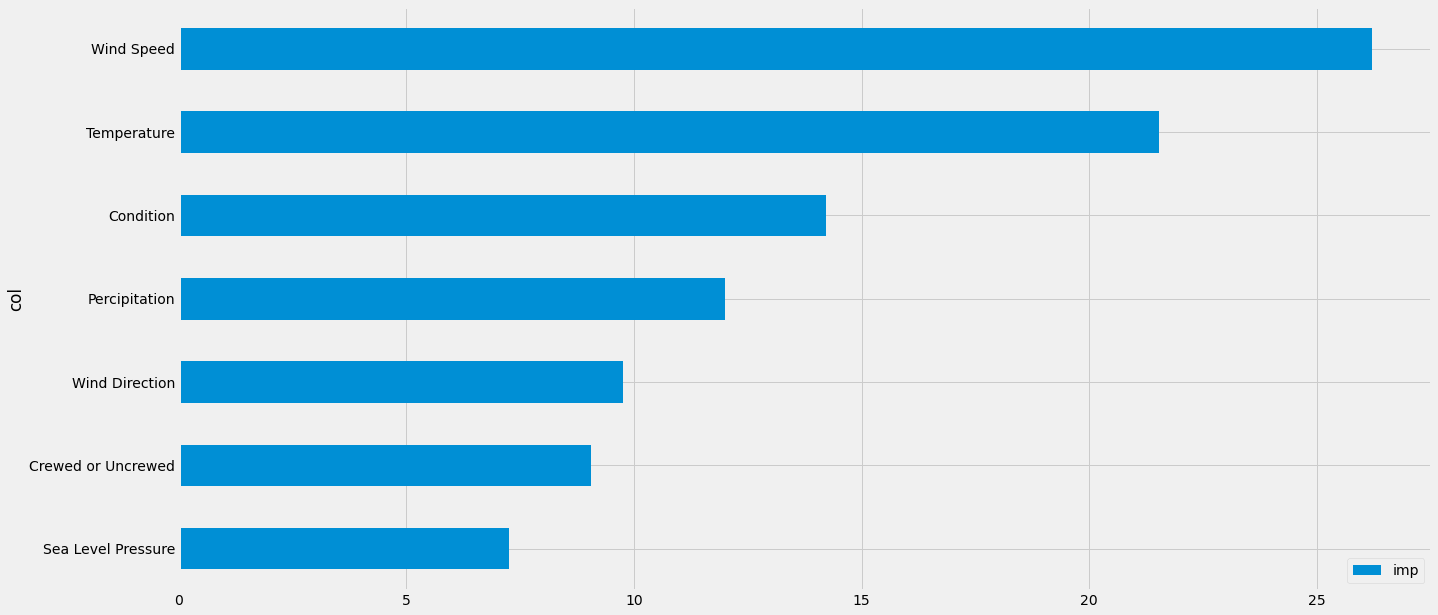

In [100]:
# Plot feature importance scores
feature_importance(catboost_model, X_train)

> Thus we can see that among all the features the Wind Speed plays a major role in determining whether or not the rocket will launch.

#### Why would you want feature importance?

Feature importance shows how much each feature contributed to the model.

We could take this information and remove features which don't contribute much to reduce dimenstionality (and save compute).

Feature importance figures also show people who may not be familiar with the problem what features of their data are most important when it comes to making predictions with machine learning models.

## 5. Precision and Recall

Precision and Recall are metrics that you use when you have an imbalanced classification problem.

- Recall - a metric which measures a models ability to find all relevant cases in a dataset.
- Precision - a metric which measures a models ability to correctly identify only relevant cases.

Combining  Precision and Recall gives us the **F1 score.**

They fall between 0 and 1, with 1 being better.

In [101]:
metrics = ['Precision', 'Recall', 'F1', 'AUC']

eval_metrics = catboost_model.eval_metrics(train_pool, metrics= metrics, plot= False)

for metric in metrics:
    print(str(metric)+ ': {}' .format(np.mean(eval_metrics[metric])))

Precision: 0.9669944989991129
Recall: 0.6639999999999998
F1: 0.7809924680851754
AUC: 0.9693081360946746


> **Recall = TP/(TP + FN)**
- Here the Recall is pretty low. This means that there is a higher amount of False Negatives (predicting 'Did not launch' when it was actually 'Launched').

> **Pression = TP/(TP + FP)**
- Precision is high. Thus, we can say say that there is less False Positives (predicting 'Launched' when it actually 'Did not launch')

## 6. Prediction on the Test dataset

Let's use the model with the highest cross-validation accuracy score to make a prediction on the test dataset.

We want to make predictions on the same columnns our model is trained on.

So we have to select the subset of right columns of the test dateframe, encode them and make a prediciton with our model.

In [102]:
X_train.head()

,Crewed or Uncrewed,Temperature,Percipitation,Wind Direction,Wind Speed,Sea Level Pressure,Condition
194,1,123,0,7,16,10,0
101,1,106,0,2,17,7,1
68,1,44,0,7,20,2,0
224,1,84,0,1,13,31,5
37,1,20,0,7,8,25,1


In [103]:
test.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
203,Pioneer 11,7-Apr-73,NaN,Cape Canaveral,NaN,NaN,83.0,73.0,77.26,NaN,80.0,58.0,69.0,0.13,0.08,S,18.0,15.0,NaN,NaN,NaN,30.06,NaN,12:37,Cloudy,NaN
266,Gemini 4,2-Jun-65,NaN,Cape Canaveral,NaN,NaN,95.0,0.0,77.68,NaN,88.0,71.0,79.0,0.00,0.20,W,14.0,10.0,NaN,NaN,NaN,29.99,NaN,13:49,Fair,NaN
152,Genesis,8-Aug-01,17:13,Cape Canaveral,Uncrewed,Y,89.0,73.0,80.74,87.0,91.0,73.0,82.0,0.00,0.25,N,10.0,10.0,7.0,NaN,NaN,30.12,NaN,13:18,Fair,NaN
9,Pioneer 4,5-Mar-59,NaN,Cape Canaveral,NaN,NaN,81.0,67.0,72.63,NaN,75.0,54.0,65.0,0.00,0.10,SE,17.0,10.0,NaN,NaN,NaN,30.12,NaN,11:42,Cloudy,NaN
233,Apollo 11,17-Jul-69,NaN,Kennedy,NaN,NaN,91.0,0.0,65.36,NaN,91.0,73.0,82.0,0.50,0.18,E,17.0,20.0,NaN,NaN,NaN,30.03,NaN,13:43,Thunder,NaN


- ### Cleaning the important columns

We are doing this because the column names of our X_train is a bit different as we have done manipulations.

In [104]:
test.rename(columns= {'Percipitation at Launch Time': 'Percipitation'}, inplace= True)

In [105]:
# Adding values to the newly created Temperature column
test['Temperature'] = test['Temp at Launch Time']

In [106]:
# Adding values to the newly created Wind Speed column
test['Wind Speed'] = test['Wind Speed at Launch Time']

In [107]:
# Create a list of columns to be used for predictions.
wanted_columns = X_train.columns
wanted_columns

Index(['Crewed or Uncrewed', 'Temperature', 'Percipitation', 'Wind Direction',
       'Wind Speed', 'Sea Level Pressure', 'Condition'],
      dtype='object')

In [108]:
# Make predictions using CatBoost model on wanted columns.
predictions = catboost_model.predict(test[wanted_columns].astype(str).apply(LabelEncoder().fit_transform))

In [109]:
# Our predictions array is comprised of 0's and 1's (Did Not Launch and Launched respectively).
predictions[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [110]:
pd.set_option('display.max_rows',100)

# Create a dataframe and append the relevant colimns.
submission = pd.DataFrame()
submission['Rocket Name'] = test['Name']
submission['Launch Date'] = test['Date'].astype('datetime64[ns]')
submission['Launched'] = predictions
submission

,Rocket Name,Launch Date,Launched
203,Pioneer 11,1973-04-07,0
266,Gemini 4,2065-06-02,0
152,Genesis,2001-08-08,0
9,Pioneer 4,2059-03-05,0
233,Apollo 11,2069-07-17,0
226,Apollo 8,2068-12-20,0
196,Pioneer 10,1972-03-01,0
109,Mariner 9,1971-06-01,0
5,Pioneer 4,2059-03-01,0
175,Deep Space 1,1998-10-22,0


> Here we can see that our predictions are a lot different from what was actually given to us in the test dataset. This can be mainly because of a lower Recall (predicting 'Did not launch' when it was actually 'Launched') and higher Precision (predicting 'Launched' when it actually 'Did not launch')



In [111]:
# Viewing the Precision and Recall
for metric in metrics:
    print(str(metric)+ ': {}' .format(np.mean(eval_metrics[metric])))

Precision: 0.9669944989991129
Recall: 0.6639999999999998
F1: 0.7809924680851754
AUC: 0.9693081360946746


In [112]:
submission[submission['Launched'] == 1]

,Rocket Name,Launch Date,Launched
237,Apollo 12,2069-11-14,1
17,Ranger 2,2061-11-18,1
7,Pioneer 4,2059-03-03,1
297,Space X Dragon,2020-05-30,1
232,Apollo 11,2069-07-16,1
22,Ranger 3,2062-01-26,1
282,Gemini 8,2066-03-16,1


- These are the rockets that according to our predictions will launch on the specific days.

In [113]:
submission[test['Launched?'] == 'Y']

,Rocket Name,Launch Date,Launched
152,Genesis,2001-08-08,0
237,Apollo 12,2069-11-14,1
57,Surveyor 1,2066-05-30,0
182,Stardust,1999-02-07,0
42,Ranger 7,2064-07-28,0
157,Ulysses,1990-10-06,0
17,Ranger 2,2061-11-18,1
7,Pioneer 4,2059-03-03,1
77,Surveyor 5,2067-09-08,0
297,Space X Dragon,2020-05-30,1


- **These were all the rockets that had launched according our test dataset and of these we have predicted that 7 of these will launch successfully. **

In [114]:
# Are our test and submission the same length?
if len(submission) == len(test):
    print('The submission and the test dataframes are of the same length')
else:
    print('Dataframes mismatched')

The submission and the test dataframes are of the same length


In [115]:
# convert submission dataframe to csv.
submission.to_csv('DATA/NASA/Predicted Rocket Launch.csv', index= False)
print('Submission csv is ready')

Submission csv is ready


In [116]:
# Checking the final submission csv.
final_submission = pd.read_csv('DATA/NASA/Predicted Rocket Launch.csv')
final_submission.head(20)

,Rocket Name,Launch Date,Launched
0,Pioneer 11,1973-04-07,0
1,Gemini 4,2065-06-02,0
2,Genesis,2001-08-08,0
3,Pioneer 4,2059-03-05,0
4,Apollo 11,2069-07-17,0
5,Apollo 8,2068-12-20,0
6,Pioneer 10,1972-03-01,0
7,Mariner 9,1971-06-01,0
8,Pioneer 4,2059-03-01,0
9,Deep Space 1,1998-10-22,0


## REFERENCES

- https://youtu.be/f1y9wDDxWnA - Daniel Bourke has expalined in a clear and well manner on how to go through this project. He has also provided his github, which is really helpful.

- https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c - This article will give a clear understanding of what Precision and Recall is.

- https://github.com/dformoso/sklearn-classification/blob/master/Data%20Science%20Workbook%20-%20Census%20Income%20Dataset.ipynb - He has given a well detailed explanation of how to approach a ML project. 